In [1]:
import torch 
import torchvision
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

1. Нахождение сложной производной. Найдите производную по x от функции. При этом надо пользоваться встроенным в PyTorch autograd.

In [2]:
def find_x_derivative(x, y):
    a = torch.tanh(x)
    b = x ** 2
    c = b / y
    d = a * c
    e = -x ** 2
    f = e + 3
    g = torch.exp(f)
    h = x ** 3
    i = y * h
    j = g + i
    k = j.log()
    l = d + k
    m = torch.sin(l)
    n = x ** 2
    o = x ** 9
    p = torch.exp(o)
    r = n * p
    s = torch.tanh(r)
    t = (m * s).sum()
    
    t.sum().backward()
    
    return x.grad

In [3]:
x = torch.randn((3,3), requires_grad = True)
y = a = torch.randn((3,3), requires_grad = True)

In [4]:
find_x_derivative(x, y)

tensor([[        nan,  6.6726e-01, -5.6714e+00],
        [-2.2574e+00,         nan, -8.9290e-03],
        [ 1.1109e+01,         nan, -1.0069e+00]])

In [5]:
def find_x_derivative2(x, y):
    func = torch.sin(torch.tan(x)*(x**2/y) + torch.log( torch.exp(-x**2+3) + x**3*y)) * torch.tan( x**2*(torch.exp(x**9)) )
    
    func.sum().backward()
    
    return x.grad

In [6]:
find_x_derivative2(x, y)

tensor([[        nan,  2.0654e-01, -5.5106e+01],
        [-1.0911e+11,         nan, -8.9345e+31],
        [-7.8851e+07,         nan, -2.2472e+00]])

2.	Нахождение косинусной близости.
Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.


In [7]:
def get_cos_sim(A, B):
    """
    A, B - torch float tensors
    """
    
    A=torch.tensor(A,dtype = float)
    B=torch.tensor(B, dtype = float)
    #B = B.t()
    norm_a = torch.norm(A, dim=1, keepdim=True)
    norm_b = torch.norm(B, dim=0, keepdim=True)
    cos_sim = A@B / (norm_a * norm_b)
    
    return cos_sim

In [8]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B = [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]]

In [9]:
get_cos_sim(A, B)

tensor([[-0.9869, -0.9977, -1.0000],
        [-0.9258, -0.9572, -0.9746],
        [-0.9014, -0.9381, -0.9594]], dtype=torch.float64)

3. Взять датасет Fashion-Mnist, построить свою нейронную сеть cо сверточными слоями и обучить эту нейронную сеть пользуясь материалами из вебинара. 

**Архитектура нейронной сети должна быть следующая:**

- 1)	Сначала должны идти два блока в которых должны присутствовать следующие слои:
* * a)	два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
* * b)	И в конце каждого блока слой макс пулинга
- 2)	в конце должны идти 3 линейных слоя.
При этом можете поиграться с разными оптимизаторами.
В качестве результата прошу приложить скрин с картинками и предсказанными классами


In [10]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = False,
    transform = transforms.ToTensor())

In [11]:
image, label = train_dataset[12]

print (image.size())
print (label)


torch.Size([1, 28, 28])
5


In [12]:
classes = ('Tshirt', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot')

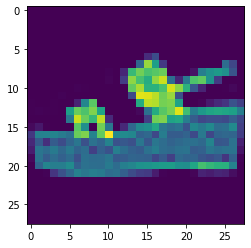

In [13]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
test_dataset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = False,
    transform = transforms.ToTensor())

In [16]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64,
                                         shuffle=True)

In [ ]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(8, 12, kernel_size=3)
        self.conv4 = nn.Conv2d(12, 16, kernel_size=3)
        self.fc1 = nn.Linear(16 * 4 * 4, 84)
        self.fc2 = nn.Linear(84, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
#         print(x.size())
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
net = Net().to(device)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [32]:
net.train()
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.177
[1,   601] loss: 0.104
[1,   901] loss: 0.092
[2,     1] loss: 0.000
[2,   301] loss: 0.085
[2,   601] loss: 0.079
[2,   901] loss: 0.075
[3,     1] loss: 0.000
[3,   301] loss: 0.070
[3,   601] loss: 0.068
[3,   901] loss: 0.066
[4,     1] loss: 0.000
[4,   301] loss: 0.062
[4,   601] loss: 0.060
[4,   901] loss: 0.060
[5,     1] loss: 0.000
[5,   301] loss: 0.057
[5,   601] loss: 0.055
[5,   901] loss: 0.055
[6,     1] loss: 0.000
[6,   301] loss: 0.053
[6,   601] loss: 0.050
[6,   901] loss: 0.052
[7,     1] loss: 0.000
[7,   301] loss: 0.049
[7,   601] loss: 0.049
[7,   901] loss: 0.050
[8,     1] loss: 0.000
[8,   301] loss: 0.047
[8,   601] loss: 0.047
[8,   901] loss: 0.046
[9,     1] loss: 0.000
[9,   301] loss: 0.045
[9,   601] loss: 0.046
[9,   901] loss: 0.044
[10,     1] loss: 0.000
[10,   301] loss: 0.043
[10,   601] loss: 0.044
[10,   901] loss: 0.043
Training is finished!


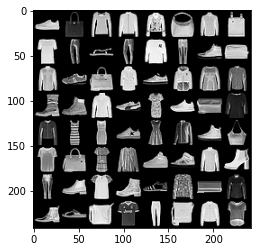

In [20]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())


In [21]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

GroundTruth:  Sneaker   Bag Pullover  Coat  Coat   Bag Shirt   Bag Shirt Trouser
Predicted:  Sneaker   Bag Pullover  Coat  Coat   Bag Shirt Tshirt Tshirt Trouser


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
net_1 = Net().to(device)
net_1.train()
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.000
[1,   301] loss: 0.036
[1,   601] loss: 0.035
[1,   901] loss: 0.035
[2,     1] loss: 0.000
[2,   301] loss: 0.036
[2,   601] loss: 0.034
[2,   901] loss: 0.034
[3,     1] loss: 0.000
[3,   301] loss: 0.034
[3,   601] loss: 0.035
[3,   901] loss: 0.035
[4,     1] loss: 0.000
[4,   301] loss: 0.035
[4,   601] loss: 0.034
[4,   901] loss: 0.034
[5,     1] loss: 0.000
[5,   301] loss: 0.034
[5,   601] loss: 0.033
[5,   901] loss: 0.035
[6,     1] loss: 0.000
[6,   301] loss: 0.034
[6,   601] loss: 0.034
[6,   901] loss: 0.033
[7,     1] loss: 0.000
[7,   301] loss: 0.033
[7,   601] loss: 0.033
[7,   901] loss: 0.034
[8,     1] loss: 0.000
[8,   301] loss: 0.034
[8,   601] loss: 0.034
[8,   901] loss: 0.032
[9,     1] loss: 0.000
[9,   301] loss: 0.033
[9,   601] loss: 0.033
[9,   901] loss: 0.032
[10,     1] loss: 0.000
[10,   301] loss: 0.033
[10,   601] loss: 0.033
[10,   901] loss: 0.033
Training is finished!


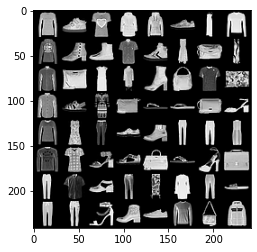

In [24]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

outputs = net_1(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())


In [25]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

GroundTruth:  Pullover Sneaker Tshirt  Coat  Coat Sneaker Dress Pullover Pullover AnkleBoot
Predicted:  Pullover Sneaker Tshirt  Coat  Coat Sneaker Dress Pullover Pullover AnkleBoot
